# Dependencies

In [3]:
pacman::p_load(igraph, graphlayouts, ggraph, ggforce, dplyr)

# Functions

In [ ]:
sampletags_columns <- function(orig_df, grepvars) {
    orig_df$index <- 1:nrow(orig_df) # add index column
    orig_df$sample_tags <- paste0(orig_df$index,",",mitchell$sample_tags) # add index to sample_tags
    splitsampletags <- strsplit(orig_df$sample_tags, split = ",") # split sample_tags by comma into a list
# for each sample_tag, extract the variables in grepvars as list
    mydf <- lapply(splitsampletags, function(sampletag){ 
        y <- unlist(sampletag)
        y <- trimws(y)
        indx <- y[1] # first element is index
        # for each variable in grepvars, extract the value if it exists, if not add NA
        myvars <- lapply(grepvars, function(myvar){
            ifelse(sum(grepl(myvar, y)) == 1, y[grepl(myvar, y)], NA) })
        myvarsdf <- as.data.frame(myvars)
        vardf <- cbind.data.frame(indx, myvarsdf)
        colnames(vardf) <- c("index", grepvars) # rename columns
        return(vardf)
    })
    return(do.call(rbind, mydf)) # return a data frame
}

In [4]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")

# Paths

In [5]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [6]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

all metadata

In [7]:
load(file = paste0(datapath,"capTCRseq/meta_div_TRB.RData"))

Warning message in load(file = paste0(datapath, "capTCRseq/meta_div_TRB.RData")):
"strings not representable in native encoding will be translated to UTF-8"


In [8]:
carey <- read.table(file = paste0(h4hpath,"Adaptive/Carey_Preterm2017/SampleOverview_11-23-2022_7-18-00_PM.tsv"), 
sep = "\t", header = T)

In [9]:
henderson <- read.table(file = paste0(h4hpath,"Adaptive/Henderson_MIS2022/SampleOverview_11-23-2022_7-27-08_PM.tsv"), 
sep = "\t", header = T)

In [10]:
mitchell <- read.table(file = paste0(h4hpath,"Adaptive/Mitchell_Michels2022/SampleOverview_11-23-2022_7-25-05_PM.tsv"),
sep = "\t", header = T)

In [11]:
emerson <- read.table(file = paste0(h4hpath,"Adaptive/emerson2017/SampleOverview_01-18-2023_8-18-39_PM.tsv"),
sep = "\t", header = T)

Clean up mitchell metadata

In [80]:
mitchell$index <- 1:nrow(mitchell)

In [81]:
mitchell$sample_tags <- paste0(mitchell$index,",",mitchell$sample_tags)

In [130]:
splitsampletags <- strsplit(mitchell$sample_tags, split = ",")

In [ ]:
("Years at visit", "Years at diagnosis", 
"Subject |Control ", "Timepoint", "Subject")

In [183]:
sampletags_columns(mitchell, c("Years at visit", "Years at diagnosis") )

index,Years at visit,Years at diagnosis
<chr>,<chr>,<chr>
1,3 Years at visit,NA
2,3 Years at visit,12.958904109589 Years at diagnosis
3,10 Years at visit,14.4328767123288 Years at diagnosis
4,0 Years at visit,18.0438356164384 Years at diagnosis
5,6 Years at visit,6.37808219178082 Years at diagnosis
6,12 Years at visit,NA
7,6 Years at visit,14.4328767123288 Years at diagnosis
8,7 Years at visit,10.558904109589 Years at diagnosis
9,7 Years at visit,11.2082191780822 Years at diagnosis


## bind all together

In [12]:
dfList <- list(carey,henderson,mitchell,emerson)
dfColList <- lapply(dfList,colnames)
commonCols <- Reduce(intersect,dfColList)


In [13]:
allAdaptive <- rbind(carey[, commonCols], henderson[, commonCols], 
mitchell[, commonCols], emerson[, commonCols])

In [14]:
lapply(list(carey, henderson, mitchell, emerson), function(x) dim(x))

[[1]]
[1] 19 30

[[2]]
[1] 62 29

[[3]]
[1] 359  29

[[4]]
[1] 786  29

In [78]:
head(mitchell$sample_tags)

[1] "03 Years, 3 Years at visit, Caucasian, Control, Control 006, Female, GAD65 0, HLA-A*0101, HLA-A*0301, HLA-B*1801, HLA-C*0701, HLA-DPA1*0103, HLA-DPB1*0201, HLA-DPB1*0401, HLA-DQA1*0301, HLA-DQA1*0501, HLA-DQB1*0201, HLA-DQB1*0302, HLA-DRB1*0301, HLA-DRB1*0401, IA-2 0, IAA 0.004, Non-Hispanic or Latino, Timepoint 3, ZnT8 NR"                                                         
[2] "03 Years, 12.958904109589 Years at diagnosis, 3 Years at visit, Case, Caucasian, Female, GAD65 0, HLA-A*0301, HLA-A*2402, HLA-B*3906, HLA-B*4402, HLA-C*0702, HLA-C*0704, HLA-DPA1*0103, HLA-DPB1*0201, HLA-DPB1*0401, HLA-DQA1*0401, HLA-DQA1*0505, HLA-DQB1*0301, HLA-DQB1*0402, HLA-DRB1*0801, HLA-DRB1*1101, IA-2 NR, IAA 0.006, Non-Hispanic or Latino, Subject 001, Timepoint 1, ZnT8 0"
[3] "10 Years, 10 Years at visit, 14.4328767123288 Years at diagnosis, Case, Caucasian, GAD65 68, HLA-A*0201, HLA-A*2501, HLA-B*1801, HLA-B*4402, HLA-C*0501, HLA-C*1203, HLA-DPA1*0103, HLA-DPB1*0301, HLA-DPB1*2301, HLA-DQA1*0102, HLA-DQA1*0103, HLA-DQB1*0602, HLA-DQB1*0603, HLA-DRB1*1301, HLA-DRB1*1501, IA-2 0, IAA 0.003, Male, Non-Hispanic or Latino, Subject 019, Timepoint 3, ZnT8 0"
[4] "0 Years at visit, 09 Months, 18.0438356164384 Years at diagnosis, Case, Caucasian, Female, GAD65 0, HLA-A*0201, HLA-B*0702, HLA-B*1501, HLA-C*0304, HLA-C*0702, HLA-DPA1*0103, HLA-DPB1*0201, HLA-DPB1*0401, HLA-DQA1*0301, HLA-DQB1*0302, HLA-DRB1*0401, HLA-DRB1*0407, Hispanic or Latino, IA-2 0, IAA 0, Subject 021, Timepoint 1, ZnT8 0"                                                 
[5] "06 Years, 6 Years at visit, 6.37808219178082 Years at diagnosis, Case, Caucasian, Female, GAD65 771, HLA-A*0201, HLA-B*0702, HLA-B*1501, HLA-C*0303, HLA-C*0702, HLA-DPA1*0103, HLA-DPB1*0401, HLA-DQA1*0102, HLA-DQA1*0301, HLA-DQB1*0302, HLA-DQB1*0602, HLA-DRB1*0401, HLA-DRB1*1501, IA-2 0, IAA 0.013, Non-Hispanic or Latino, Subject 003, Timepoint 4, ZnT8 0.053"                     
[6] "12 Years, 12 Years at visit, Caucasian, Control, Control 012, GAD65 0, HLA-A*0206, HLA-A*2902, HLA-B*1801, HLA-B*4002, HLA-C*0305, HLA-C*0501, HLA-DPA1*0103, HLA-DPA1*0201, HLA-DPB1*0202, HLA-DPB1*1401, HLA-DQA1*0301, HLA-DQA1*0501, HLA-DQB1*0201, HLA-DQB1*0302, HLA-DRB1*0301, HLA-DRB1*0407, IA-2 0, IAA 0.001, Male, Non-Hispanic or Latino, Timepoint 4, ZnT8 0"

In [ ]:
tocol <- function(df,mycol ,x){
df[[x]] <- NA
df[[mycol]]


}

In [46]:
tmp <- mitchell %>% 
  tibble::rowid_to_column("id") %>% 
  tidyr::separate_rows(sample_tags, sep = ",") %>% 
  tidyr::pivot_wider(id_cols = id,
                     names_from = sample_tags,
                     values_from = sample_tags) %>% 
  dplyr::select(-id) %>% 
  magrittr::set_colnames(paste0("sample_tags", 1:ncol(.)))

In [70]:
tmp <- (strsplit(mitchell$sample_tags, split = ","))

In [77]:
as.data.frame(lapply(tmp, function(x) { y <- unlist(x)
y[grepl("Years at visit",y)]}))

ERROR: Error in (function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE, : arguments imply differing number of rows: 1, 0


In [66]:
tmp[grepl("Years at visit",tmp)]

[1] " 3 Years at visit"

In [48]:
table(tmp$sample_tags)


                            03 Years                             04 Years 
                                   1                                    5 
                            05 Years                             06 Years 
                                   5                                    6 
                            07 Years                            08 Months 
                                   4                                    3 
                            08 Years                            09 Months 
                                   9                                    7 
                            09 Years                     1 Years at visit 
                                  18                                   22 
                           10 Months                             10 Years 
                                   3                                   13 
               10 Years at diagnosis                    10 Years at visit 
                        

In [6]:
load(file = paste0(h4hpath, "analysis/GLIPH/GLIPH_input/gliphinput_int_adaptivetop1000_vdj.RData"))

In [7]:
#load(file = paste0(h4hpath, "analysis/GLIPH/GLIPH_input/gliphinput_int_adaptivetop1000_vdj_ab_dedup.RData"))

In [8]:
load(file = paste0(h4hpath, "analysis/GLIPH/gliph_rm_na_singlerm.RData"))

In [10]:
gliph_rm_na_singlerm$index <- NULL
gliph_rm_na_singlerm$hla_score <- NULL

In [12]:
gliph_all <- merge(gliph_rm_na_singlerm, gliphinput_int_adaptive_vdj, by.x = "Sample", by.y = "subject:condition", all = F)

In [13]:
dim(gliph_all)

[1] 25448    24

In [15]:
save(gliph_all, file = paste0(datapath, "GLIPH/gliph_all.RData"))

# Communities of GLIPH specificity groups

In [16]:
load(file = paste0(datapath, "GLIPH/gliph_all.RData"))

Make an incidence matrix

In [19]:
dim(gliph_all)

[1] 25448    24

In [17]:
gliph_data_matrix_df <- as.data.frame.matrix(table(gliph_all %>% select(type , TcRb)))

In [18]:
gliph_data_igrf <- igraph::graph_from_incidence_matrix(gliph_data_matrix_df, weighted = T )

In [20]:
V(gliph_data_igrf)$subject <- sapply(V(gliph_data_igrf)$name, function(x){
    gliph_all$subject[match(x, gliph_all$TcRb)]})

In [21]:
V(gliph_data_igrf)$subject[is.na(V(gliph_data_igrf)$subject)] <- sapply(V(gliph_data_igrf)$name[is.na(V(gliph_data_igrf)$subject)], function(x){
    gliph_all$subject[match(x, gliph_all$type)]
})

In [22]:
V(gliph_data_igrf)$cancergroup <- sapply(V(gliph_data_igrf)$subject, function(x){
    meta_div$cancergroup[match(x, meta_div$Patient)]
}
                                    )

In [23]:
gliph_data_igrf

IGRAPH f46c6f8 UNWB 12894 14251 -- 
+ attr: type (v/l), name (v/c), subject (v/c), cancergroup (v/c),
| weight (e/n)
+ edges from f46c6f8 (vertex names):
 [1] global-%A --CAAPALTF  global-%A --CAPAAVHF  global-%A --CARLAAFF 
 [4] global-%A --CASGADTF  global-%A --CASGAQYV  global-%A --CASIAFTF 
 [7] global-%A --CASKAAFF  global-%A --CASKAENF  global-%A --CASKASAF 
[10] global-%A --CASPAAFF  global-%A --CASPAQFF  global-%A --CASRAQHF 
[13] global-%A --CASSAAVG  global-%A --CASSAEYF  global-%A --CASSAGFF 
[16] global-%A --CASSASTF  global-%A --CASVATFF  global-%A --CATLAGQF 
[19] global-%A --CATQATHF  global-%A --CSAGALHF  global-%A --CSAKAGVF 
+ ... omitted several edges

In [24]:
neighbors(bipartite.projection(gliph_data_igrf)$proj1, "global-%A")

+ 6/820 vertices, named, from b41a973:
[1] global-G% global-K% global-P% global-Q% global-R% global-S%

In [25]:
myg <- (bipartite.projection(gliph_data_igrf)$proj1)

In [26]:
myg1 <- delete_vertices( myg, degree(myg) == 0)

In [27]:
myg1

IGRAPH 1075900 UNW- 510 707 -- 
+ attr: name (v/c), subject (v/c), cancergroup (v/c), weight (e/n)
+ edges from 1075900 (vertex names):
 [1] global-%A     --global-P%      global-%A     --global-G%     
 [3] global-%A     --global-K%      global-%A     --global-R%     
 [5] global-%A     --global-S%      global-%A     --global-Q%     
 [7] global-%AE    --global-T%E     global-%AE    --global-R%E    
 [9] global-%AE    --global-P%E     global-%AE    --global-S%E    
[11] global-%AG    --global-G%G     global-%AG    --global-S%G    
[13] global-%AG    --global-R%G     global-%AGTE  --global-R%GTE  
[15] global-%AGTE  --global-SA%TE   global-%DNTE  --global-SD%TE  
+ ... omitted several edges

In [28]:
myk <- cluster_louvain(myg1, resolution = 1, weights = NULL)

In [34]:
#myk <- cluster_edge_betweenness(myg1)


Warning message in cluster_edge_betweenness(myg1):
"At core/community/edge_betweenness.c:485 : Membership vector will be selected based on the lowest modularity score."
Warning message in cluster_edge_betweenness(myg1):
"At core/community/edge_betweenness.c:492 : Modularity calculation with weighted edge betweenness community detection might not make sense -- modularity treats edge weights as similarities while edge betwenness treats them as distances."


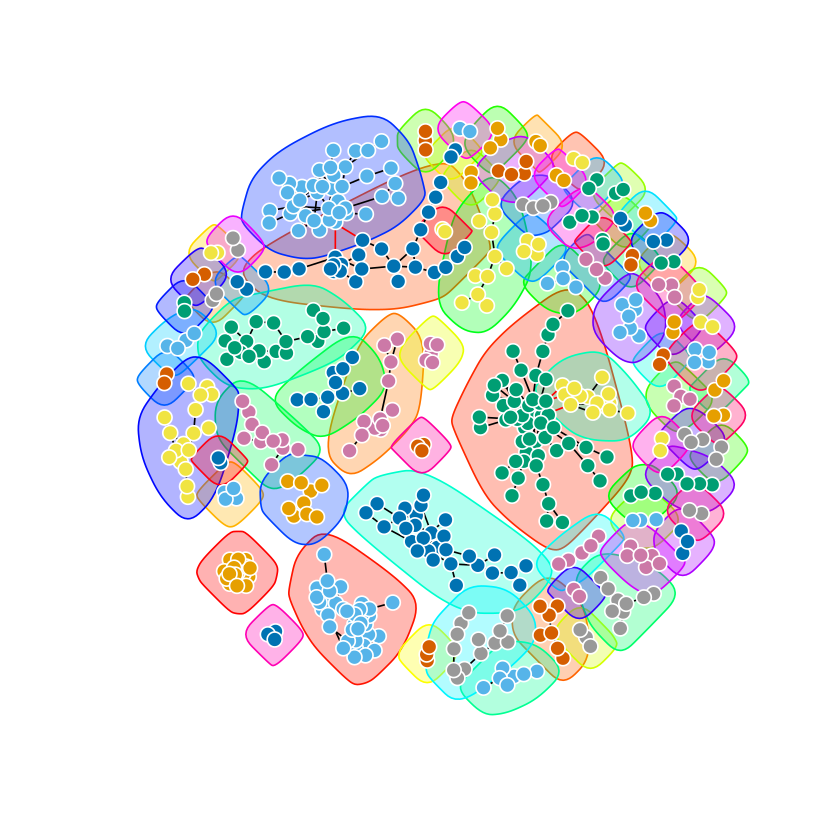

In [35]:
plot(myk, myg1, vertex.label=NA, vertex.frame.color="white", vertex.size=5)

In [36]:
V(myg1)$community <- as.character(myk$membership)

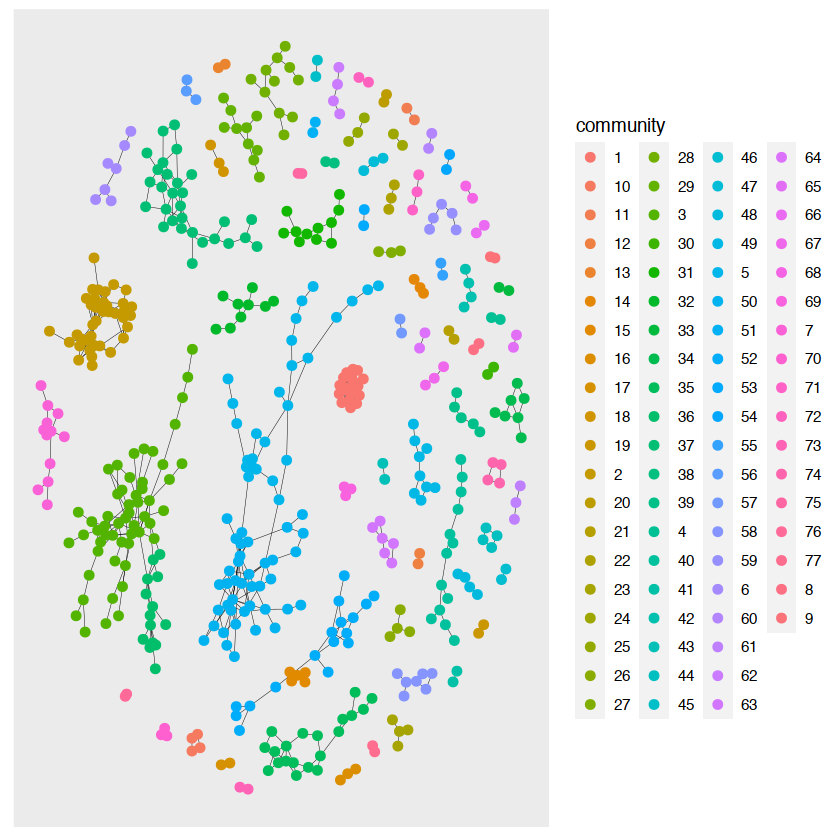

In [37]:
ggraph(myg1 , "fr", weights = NULL ) +
geom_edge_link(edge_width = 0.1, edge_colour = "#000000") + 
geom_node_point(aes(color = community), size = 2)

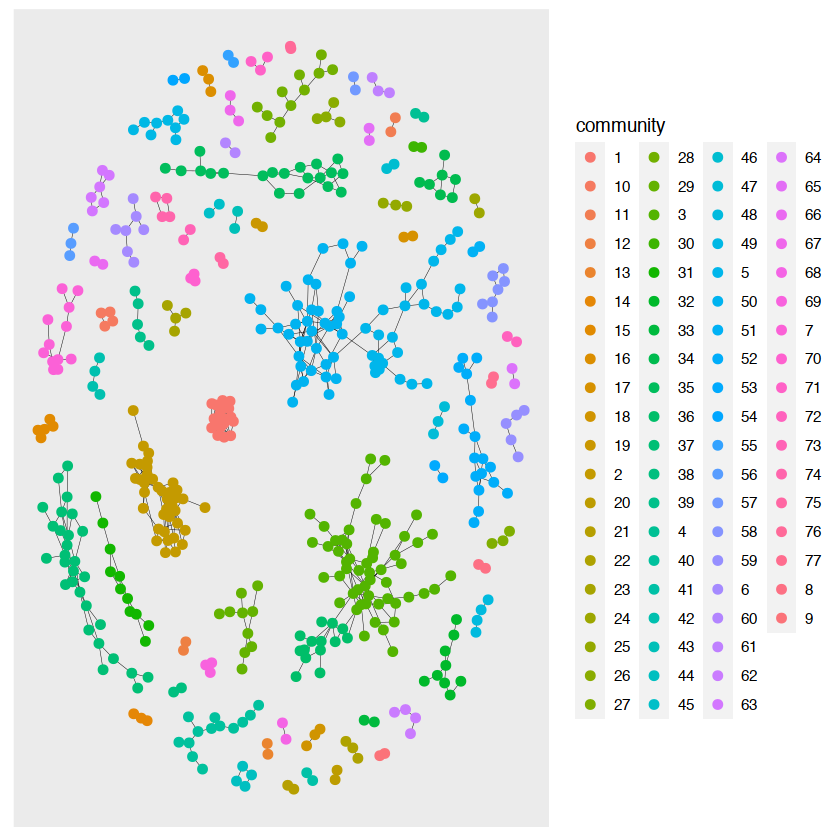

In [33]:
ggraph(myg1 , "fr", weights = NULL ) +
geom_edge_link(edge_width = 0.1, edge_colour = "#000000") + 
geom_node_point(aes(color = community), size = 2)a

In [38]:
library(immunedeconv)

Loading required package: EPIC



In [39]:
sessionInfo(package = "immunedeconv")

R version 4.0.3 Patched (2020-12-29 r79725)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] C

attached base packages:
character(0)

other attached packages:
[1] immunedeconv_2.0.0

loaded via a namespace (and not attached):
  [1] utils_4.0.3           nlme_3.1-152          matrixStats_0.62.0   
  [4] bit64_4.0.5           httr_1.4.2            data.tree_1.0.0      
  [7] repr_1.1.3            tools_4.0.3           utf8_1.2.2           
 [10] R6_2.5.1              DBI_1.1.2             BiocGenerics_0.36.1  
 [13] mgcv_1.8-33           colorspace_2.0-3      withr_2.5.0          
 [16] tidyselect_1.1.2      gridExtra_2.3         bit_4.0.4            
 [19] compiler_4.0.3        preprocessCore_1.52.1 cli_3.4.1            
 [22] Biobase_2.50.0        pacma

# Communities of subjects based on their correlation

Make an sample x cluster frequency matrix 

In [430]:
mymat <- matrix(nrow = length(unique(gliph_meta_int$basename)), ncol = length(unique(gliph_meta_int$type)),
               dimnames = list(unique(gliph_meta_int$basename), unique(gliph_meta_int$type)))

In [431]:
for(s in unique(gliph_meta_int$basename)){
    mysample <- gliph_meta_int[ gliph_meta_int$basename == s,]
    mytab <- table(mysample$type)
    mymat[s,rownames(mytab)] <- mytab
}

In [434]:
dim(mymat)

[1] 265 257

In [438]:
summary(colSums(is.na(mymat)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  218.0   258.0   262.0   259.6   264.0   264.0 

In [439]:
# keep clusters in at least two samples
mymat <- mymat[,colSums(is.na(mymat)) <= 263]

In [441]:
summary(rowSums(is.na(mymat)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    149     177     181     179     183     184 

In [442]:
#keep samples with at least two clusters
mymat <- mymat[rowSums(is.na(mymat)) <= 182,]

In [443]:
dim(mymat)

[1] 195 184

In [444]:
# convert NA to 0
mymat[ is.na(mymat)] <- 0

In [525]:
# correlation
mycormat <- cor(t(mymat), method = "spearman")

### heatmap

In [561]:
# convert negative correlation to 0
mycormat[mycormat < 0] <- 0

In [562]:
library(ComplexHeatmap)

In [563]:
makematrix_4hm <- function(df, var, name ){
    mymat <- df[[var]]
names(mymat) <- df[["basename"]]
mymat <- t(as.matrix(mymat))
rownames(mymat) <- name
    
    return(mymat)
}

In [564]:
meta_div_orignal <- meta_div

In [565]:
meta_div <- meta_div[ !is.na(meta_div$basename),]

In [566]:
rownames(meta_div) <- (meta_div$basename)

In [568]:
meta_div <- meta_div[colnames(mycormat),]

In [569]:
dim(meta_div)

[1] 195  58

In [570]:
mycohort <- makematrix_4hm(meta_div, "Disease_type", "Cohort")
mycycle <- makematrix_4hm(meta_div, "cycle", "Cycle")
mysample <- makematrix_4hm(meta_div, "sampletype", "Sample type")
mygroup <- makematrix_4hm(meta_div, "cancergroup", "Cancer type")

In [574]:
cycle_col

X00       X00       X00       X00                 X01       X02       X03 
"#bec2be" "#bec2be" "#bec2be" "#bec2be" "#bec2be" "#1f78b4" "#a6cee3" "#b2df8a" 
      X04       X05 
"#33a02c" "#e31a1c"

In [575]:
cycle_col <- c("#bec2be", cycle_col)
names(cycle_col)[1] <- "X00"

In [576]:
group_col <- c("#bec2be","black", group_col)
names(group_col)[1] <- "Normal"
names(group_col)[2] <- "LFS"

In [578]:
cohort_hm <- Heatmap(mycohort, col = cohort_col, height = unit(1,"cm"))

cycle_hm <- Heatmap(mycycle, col = cycle_col, , height = unit(1,"cm"))

sample_hm <- Heatmap(mysample, col = type_col, , height = unit(1,"cm"))

group_hm <- Heatmap(mygroup, col = group_col, , height = unit(1,"cm"))

In [579]:
mypts <- makematrix_4hm(meta_div, "Patient", "Patient")

In [580]:
pts_hm <- Heatmap(mypts,  height = unit(1,"cm"), show_heatmap_legend = FALSE, show_column_names = FALSE)

In [582]:
hm <- Heatmap(mycormat, show_row_names = TRUE, row_names_gp = gpar(fontsize = 3))

The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.



In [583]:
pdf(paste0(plotpath, "heatmap_clusters_int_LFS.pdf"), width = 10, height = 10)
hm %v% cohort_hm %v% cycle_hm %v% sample_hm %v% group_hm %v% pts_hm
dev.off()

pdf 
  2

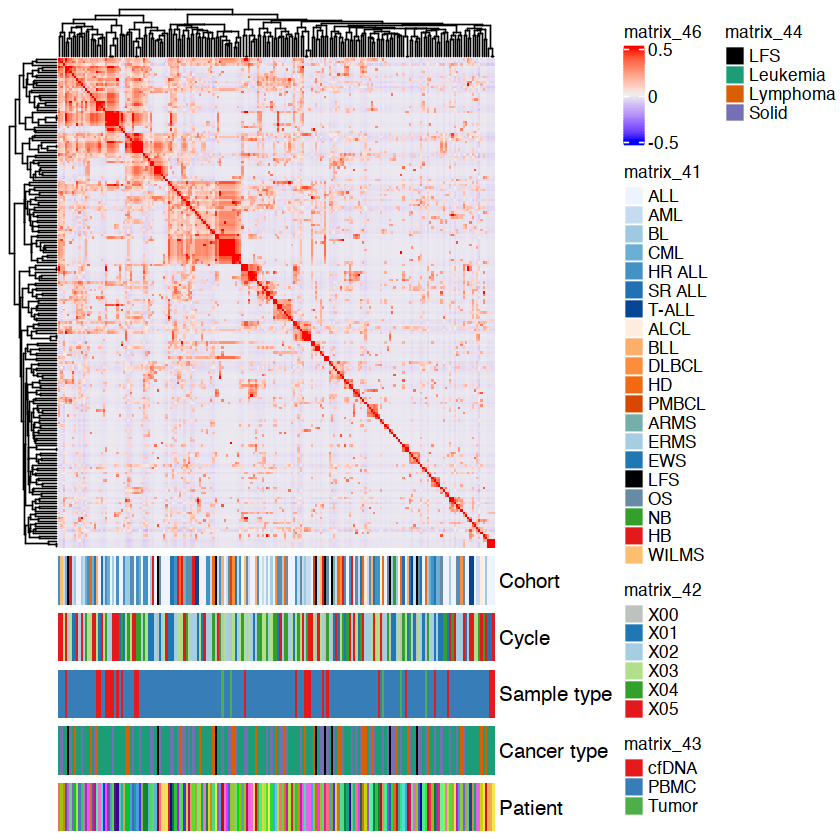

In [552]:
hm %v% cohort_hm %v% cycle_hm %v% sample_hm %v% group_hm %v% pts_hm

### Graph

In [278]:
# convert negative correlation to 0
mycormat[mycormat < 0] <- 0

In [291]:
summary(as.vector(mycormat))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.05179 0.06836 1.00000 

In [279]:
#graph
g <- graph_from_adjacency_matrix(mycormat, mode = "undirected", weighted = TRUE, diag = FALSE)

In [280]:
V(g)$Disease_type <- sapply(V(g)$name, function(x){
    gliph_meta_int$Disease_type[match(x, gliph_meta_int$sample_id)]
}
                                    )

In [281]:
V(g)$Age <- sapply(V(g)$name, function(x){
    gliph_meta_int$Age[match(x, gliph_meta_int$sample_id)]
}
                                    )

In [282]:
V(g)$Cycle <- sapply(V(g)$name, function(x){
    gliph_meta_int$cycle[match(x, gliph_meta_int$sample_id)]
}
                                    )

In [283]:
V(g)$cancergroup <- sapply(V(g)$name, function(x){
    gliph_meta_int$cancergroup[match(x, gliph_meta_int$sample_id)]
}
                                    )

In [284]:
V(g)$sampletype <- sapply(V(g)$name, function(x){
    gliph_meta_int$sampletype[match(x, gliph_meta_int$sample_id)]
}
                                    )

In [343]:
V(g)$Patient <- sapply(V(g)$name, function(x){
    gliph_meta_int$Patient[match(x, gliph_meta_int$sample_id)]
}
                                    )

[1] 0.1549289

[1] 0.1019652

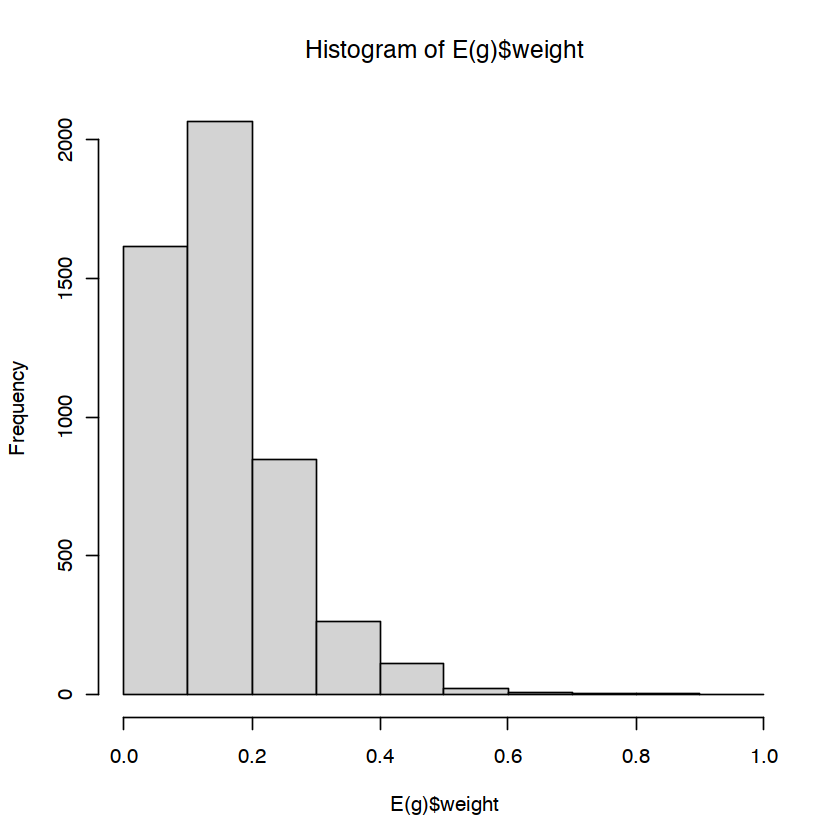

In [285]:
hist(E(g)$weight)
mean(E(g)$weight)
sd(E(g)$weight)

In [286]:
#mylayout <- layout_with_drl(g)
#mylayout <- norm_coords(mylayout, ymin=-1, ymax=1, xmin=-1, xmax=1)

In [335]:
#names(cycle_col) <- paste("X", names(cycle_col), sep = "")

In [345]:
table(V(g)$cancergroup)


Leukemia      LFS Lymphoma    Solid 
     100        8       24       50 

In [347]:
group_col <- c(group_col, "black")

In [352]:
names(group_col)[4] <- "LFS"

In [353]:
group_col

Leukemia  Lymphoma     Solid       LFS 
"#1B9E77" "#D95F02" "#7570B3"   "black"

In [289]:
type_col <- structure(c("#e41a1c", "#377eb8", "#4daf4a"),
                   names = c("cfDNA", "PBMC", "Tumor"))

In [310]:
E(g)$width <- 10*E(g)$weight

In [354]:
V(g)$color <- group_col[match(V(g)$cancergroup, names(group_col))]

In [297]:
#V(g)$shape <- shapes[match(V(g)$Cohort, names(shapes))]

In [320]:
mylayout <- layout_with_drl(g)
mylayout <- norm_coords(mylayout, ymin=-1, ymax=1, xmin=-1, xmax=1)

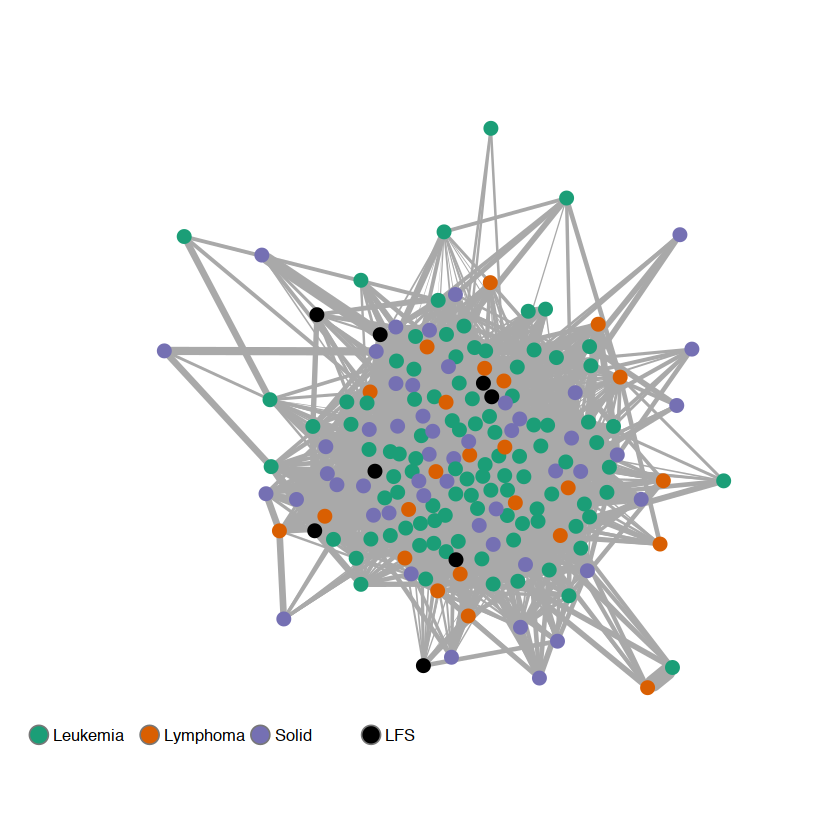

In [355]:
#par(mfrow=c(2,2), mar=c(0,0,0,0))
plot(g, vertex.label=NA, vertex.frame.color="transparent", vertex.size=5)
legend(x=-1.5, y=-1.1, names(group_col), pch=21,
       col="#777777", pt.bg=group_col, pt.cex=2, cex=.8, bty="n", ncol=4)

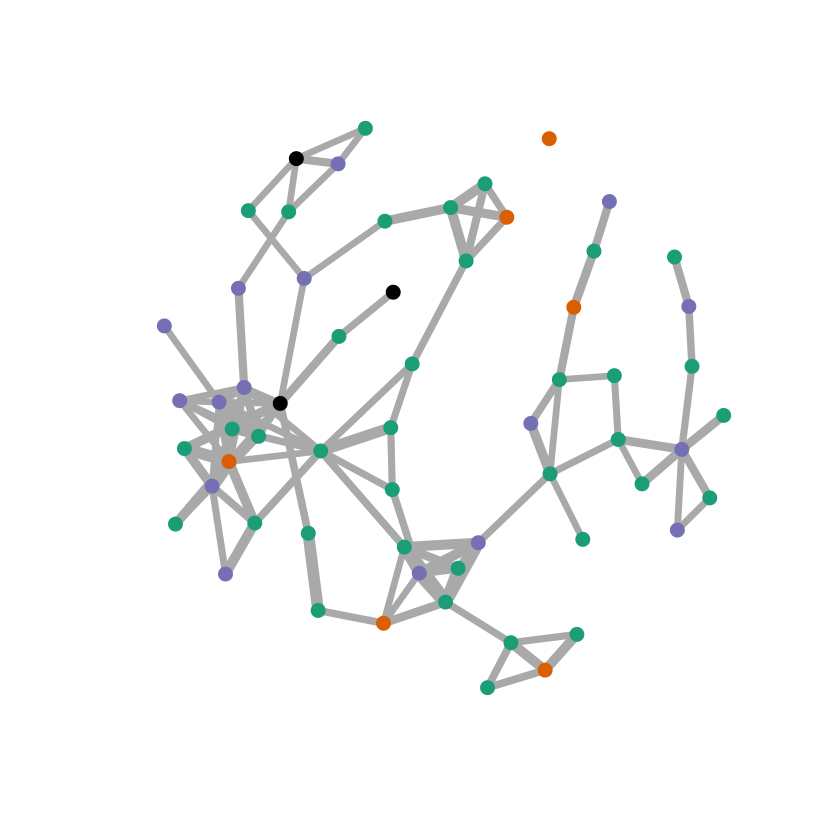

In [371]:
g.sp <- delete_edges(g, E(g)[weight< 0.4])
g.sp <- delete_vertices(g.sp, V(g.sp)[degree(g.sp) <= 1])

#mylayout <- layout_with_drl(g.sp)
#mylayout <- norm_coords(mylayout, ymin=-1, ymax=1, xmin=-1, xmax=1)
plot(g.sp, vertex.label=NA, vertex.frame.color="transparent", vertex.size=5)

In [360]:
dend <- cluster_edge_betweenness(g.sp)

Warning message in cluster_edge_betweenness(g.sp):
“At core/community/edge_betweenness.c:485 : Membership vector will be selected based on the lowest modularity score.”
Warning message in cluster_edge_betweenness(g.sp):
“At core/community/edge_betweenness.c:492 : Modularity calculation with weighted edge betweenness community detection might not make sense -- modularity treats edge weights as similarities while edge betwenness treats them as distances.”


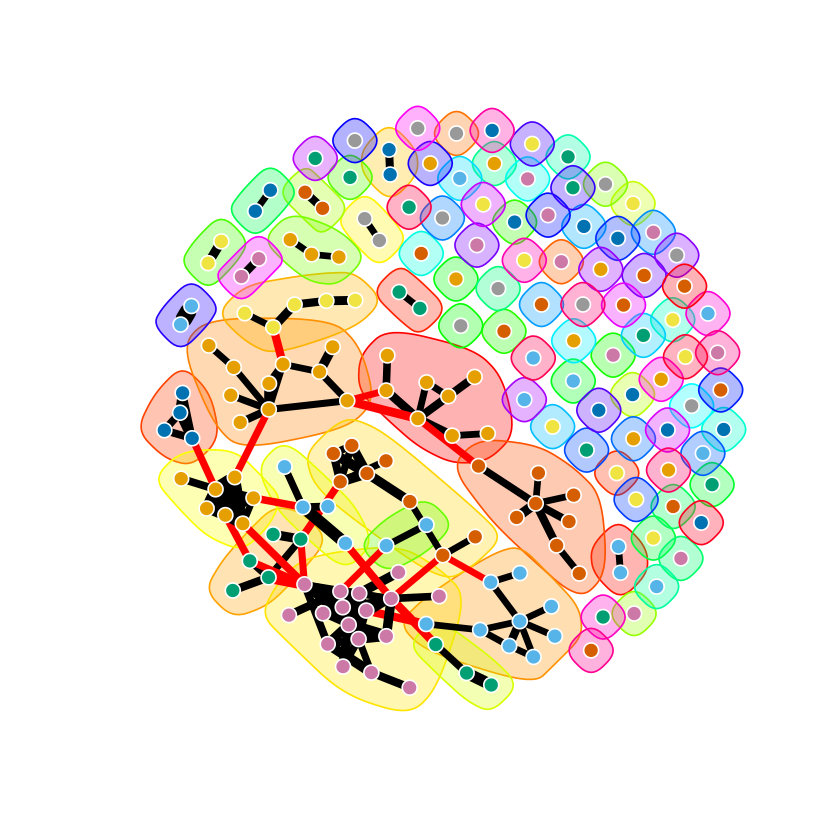

In [361]:
plot(dend, g.sp, vertex.label=NA, vertex.frame.color="white", vertex.size=5)